In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

DATA LOADING

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### We saw that there is no null values present in the dataset

In [9]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### DATA VISUALIZATION

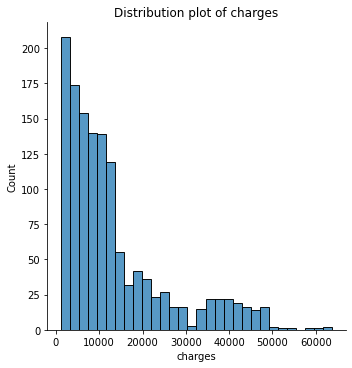

In [10]:
sns.displot(data=data,x=data['charges'])
plt.title("Distribution plot of charges")
plt.show()

#### Let us encode the categorical values to check correalation among the colums

In [11]:
from sklearn.preprocessing import LabelEncoder
label_data = data.copy();
le = LabelEncoder()
label_data['sex']=le.fit_transform(label_data['sex'])

label_data['smoker'] = le.fit_transform(label_data['smoker'])

label_data['region'] = le.fit_transform(data['region'])

In [12]:
label_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [13]:
label_data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

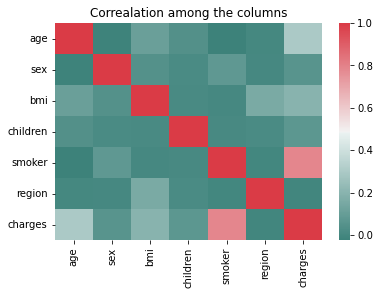

In [14]:
sns.heatmap(label_data.corr(),cmap=sns.diverging_palette(180,10,as_cmap=True))
plt.title("Correalation among the columns")
plt.show()

#### We can see charges mainly depend upon smoking.

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

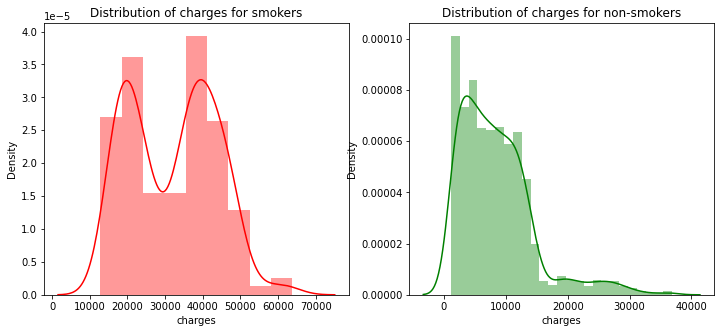

In [15]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(label_data[(label_data.smoker == 1)]["charges"],color='r',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(label_data[(label_data.smoker == 0)]['charges'],color='g',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

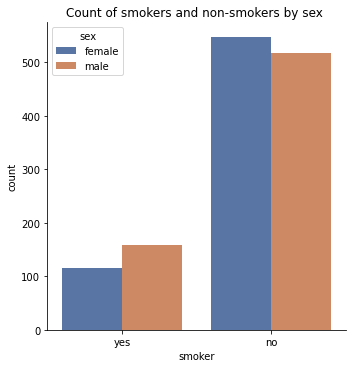

In [16]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=data,legend_out=False,palette='deep')
plt.title("Count of smokers and non-smokers by sex ")
plt.show()

##### From the plot we can see that count of smokers is less than non-smokers and number of male smoker is more.

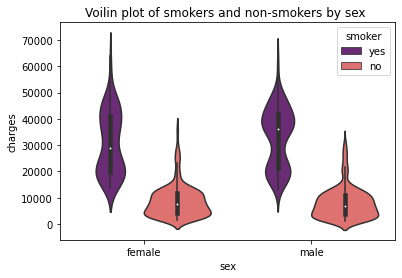

In [17]:
a=sns.violinplot(x='sex',y='charges',hue='smoker',data=data,palette='magma')
plt.title("Voilin plot of smokers and non-smokers by sex ")
plt.show()

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

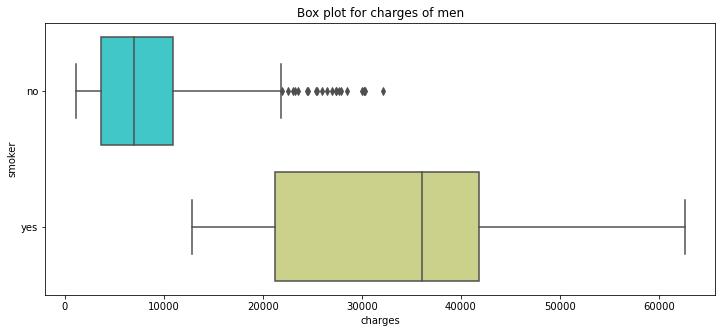

In [18]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 'male')] , orient="h", palette = 'rainbow')

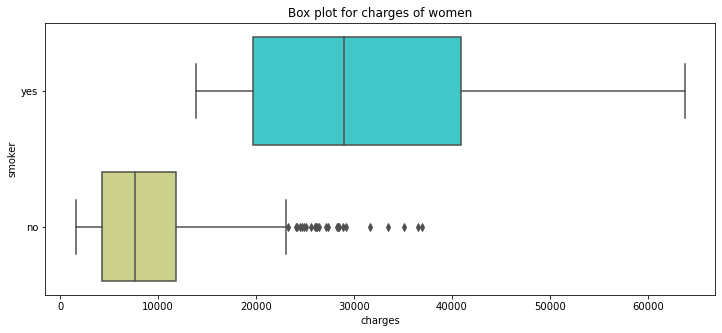

In [19]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 'female')] , orient="h", palette = 'rainbow')
plt.show()

##### From the above box plots, we can see that the charges spend on insurance is almost similar for both man and women

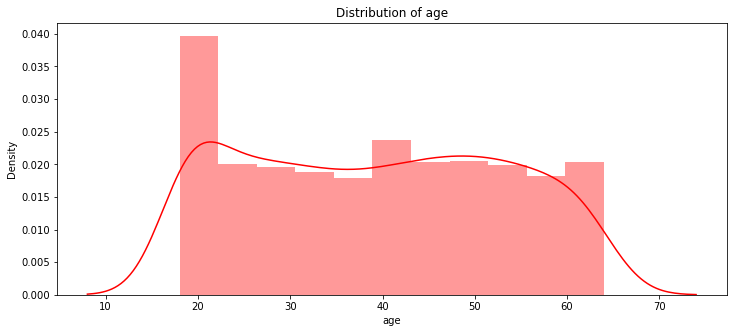

In [20]:

plt.figure(figsize=(12,5))
plt.title("Distribution of age")
sns.distplot(data['age'],color='r')
plt.show()

<AxesSubplot:xlabel='age', ylabel='count'>

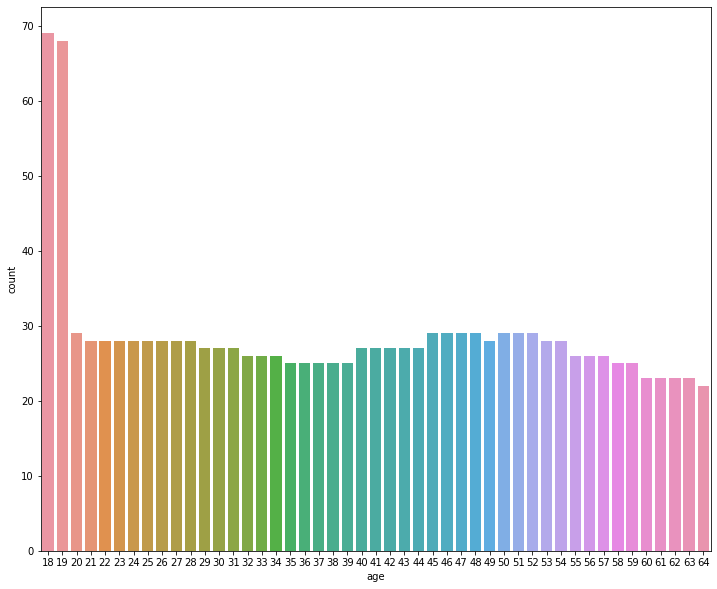

In [21]:
plt.figure(figsize=(12,10))
sns.countplot(data['age'])

##### From the above bar plot we can see that people of age 18 and 19 is maximum.

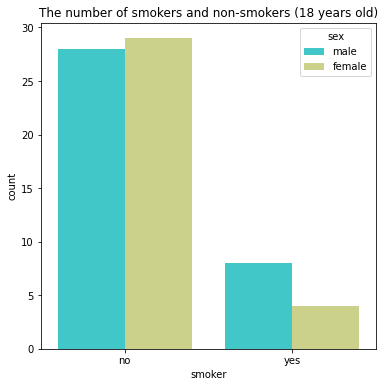

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',hue='sex',palette="rainbow",data=data[(data['age']==18)])
plt.title("The number of smokers and non-smokers (18 years old)")
plt.show()

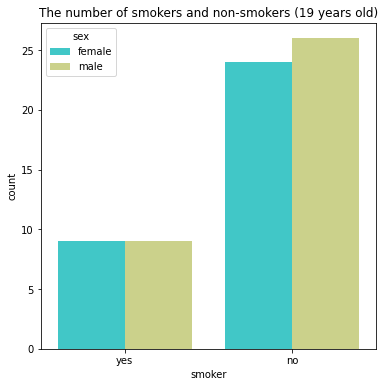

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',hue='sex',palette="rainbow",data=data[(data['age']==19)])
plt.title("The number of smokers and non-smokers (19 years old)")
plt.show()

#### We can see the number of smokers are relatively less than non-smokers. Lets check how much they spend on insurance.

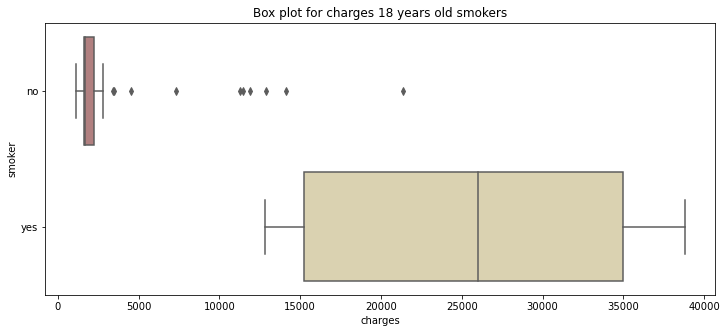

In [24]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')
plt.show()

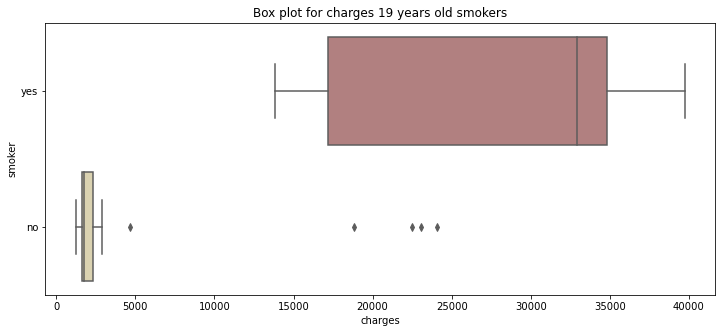

In [25]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 19 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 19)] , orient="h", palette = 'pink')
plt.show()

##### Quite shocking that smokers at the age just 18 and 19 spend a huge amount on medical that may be due to others diseases. Lets, see the dependence of age and charges based on smoking.

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

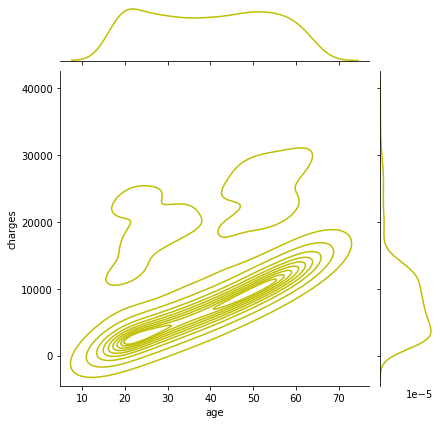

In [26]:
g = sns.jointplot(x="age", y="charges",color='y', data = data[(data.smoker == 'no')],kind="kde")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

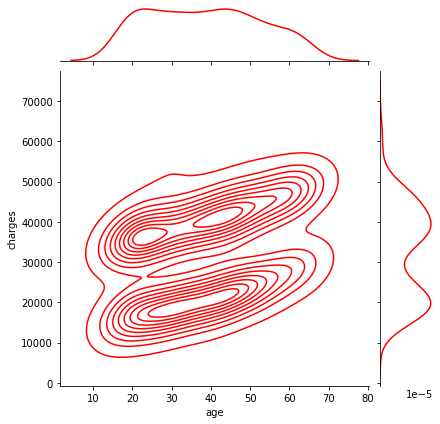

In [27]:
g = sns.jointplot(x="age", y="charges",color='r', data = data[(data.smoker == 'yes')],kind="kde")
ax.set_title('Distribution of charges and age for smokers')

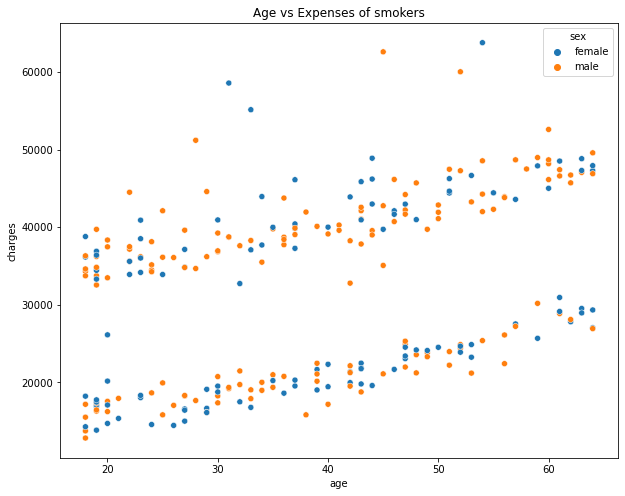

In [28]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='age',y='charges',hue='sex' ,  data=data[data['smoker']=='yes'])
ax = ax.set_title("Age vs Expenses of smokers")
# plt.xlabel("Age")
# plt.ylabel("Expenses")
plt.show(ax)

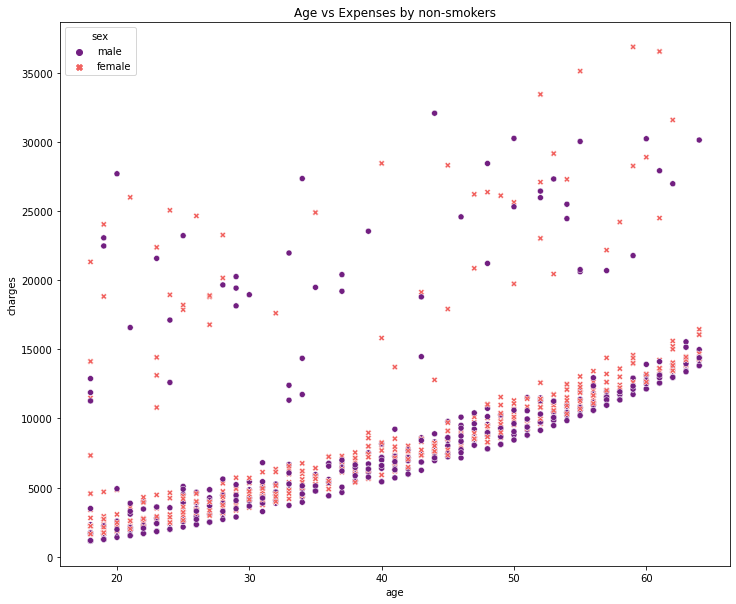

In [29]:
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='age',y='charges',hue='sex' ,data=data[(data['smoker']=='no')],style='sex',palette='magma')
ax = ax.set_title("Age vs Expenses by non-smokers")
plt.show(ax)

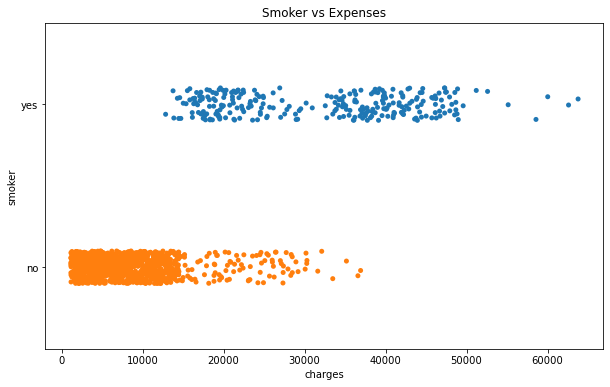

In [30]:
plt.figure(figsize=(10,6))
ax = sns.stripplot(y='smoker',x='charges',data=data,orient='h',jitter=True)
ax.set_title("Smoker vs Expenses")
plt.show(ax)

Text(0.5, 1.0, 'Smokers and non-smokers')

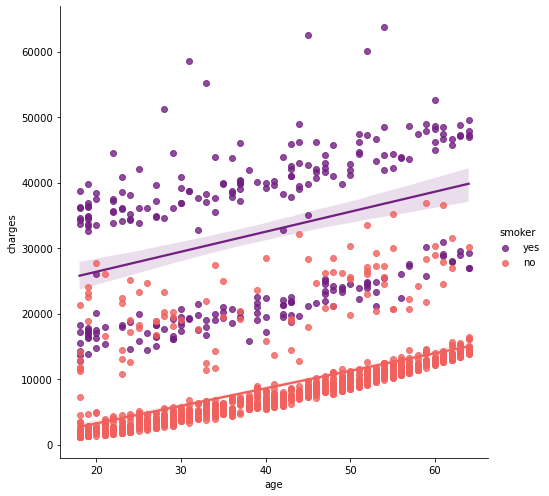

In [31]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'magma', size = 7)
ax.set_title('Smokers and non-smokers')

#### We can see that for non-smokers the charges increases with age for most cases. While no such dependancy in case of smokers.
#### Now lets check for bmi.

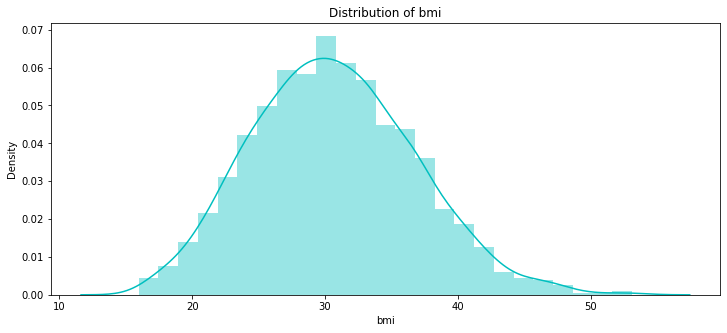

In [32]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'c')

##### bmi till 30 is considered good. So let's check distribution of charges above 30

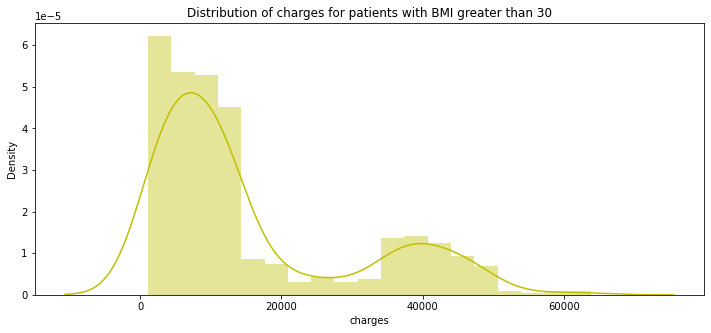

In [33]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'y')

Text(0.5, 1.0, 'charges vs bmi')

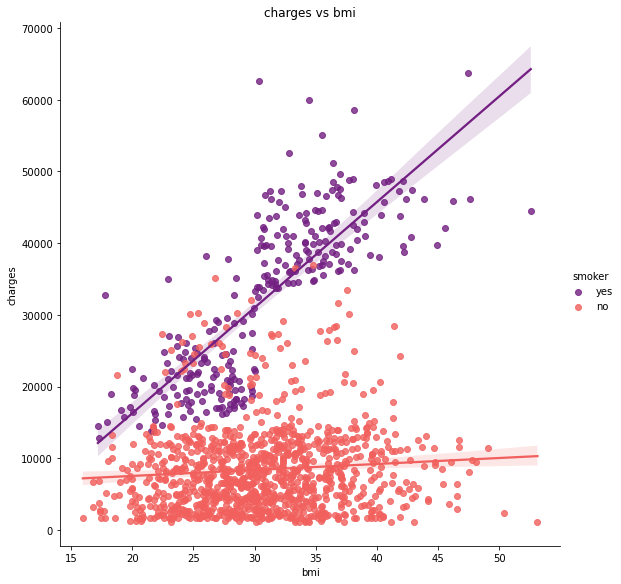

In [34]:
sns.lmplot(x="bmi", y="charges", hue="smoker",height=8, data=data, palette = 'magma', size = 8)
plt.title("charges vs bmi")

#### We can see that bmi for smoker is high than non-smokers. Now lets move to children

Text(0.5, 1.0, 'no of children parrent have')

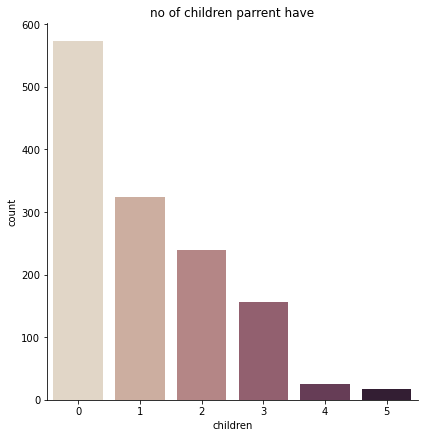

In [35]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)
plt.title("no of children parrent have")

#### Most fo the patient don't have children. Let's check if people who smoke have children.

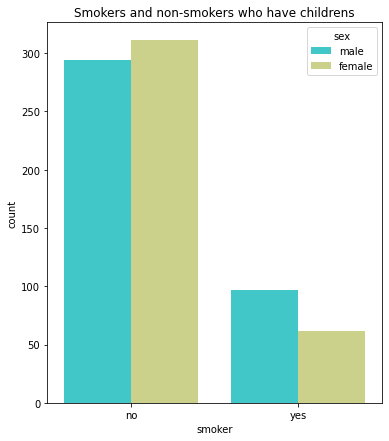

In [36]:
plt.figure(figsize=(6,7))
sns.countplot(x='smoker',hue='sex',palette='rainbow',data=data[data['children']>0])
plt.title('Smokers and non-smokers who have childrens')
plt.show()

## Spliting Data


In [37]:
label_data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [38]:
x=label_data.iloc[:,:5]
x.drop('children',inplace=True,axis=1)
y=label_data.iloc[:,6]
y = np.log(y)

In [39]:
x.head()

,age,sex,bmi,smoker
0,19,0,27.900,1
1,18,1,33.770,0
2,28,1,33.000,0
3,33,1,22.705,0
4,32,1,28.880,0


In [40]:
y.head()

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges, dtype: float64

## Modeling

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [42]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=1)

In [43]:
MSE_Score = []
R2_Score = []
Model_Score = []
Algorithm = []

LINEAR REGRESSION

In [44]:
model = LinearRegression()
Algorithm.append('Linear Regression')
model.fit(X_train,y_train)
pred = model.predict(X_test)
Model_Score.append(model.score(X_train,y_train))
MSE_Score.append(mean_squared_error(y_test, pred))
R2_Score.append(r2_score(y_test, pred))

In [45]:
print("Intercept value:", model.intercept_)
print("Coefficient values:", model.coef_)

Intercept value: 7.195606022819433
Coefficient values: [ 0.03468472 -0.06192576  0.00855418  1.52900298]


RANDOM FOREST REGRESSOR

In [46]:
model = RandomForestRegressor(n_estimators = 300)
Algorithm.append('Random Forest Regression')
model.fit(X_train,y_train)
pred = model.predict(X_test)
Model_Score.append(model.score(X_train,y_train))
MSE_Score.append(mean_squared_error(y_test, pred))
R2_Score.append(r2_score(y_test, pred))

SUPPORT VECTOR REGRESSOR

In [47]:
Algorithm.append('Support Vector Regressor')
model = SVR(kernel = 'rbf')
model.fit(X_train,y_train)
pred = model.predict(X_test)
Model_Score.append(model.score(X_train,y_train))
MSE_Score.append(mean_squared_error(y_test, pred))
R2_Score.append(r2_score(y_test, pred))

DECISION TREE REGRESSOR

In [48]:
Algorithm.append('Decision Tree Regressor')
model=DecisionTreeRegressor(random_state = 1,max_depth=4)
model.fit(X_train,y_train)
pred = model.predict(X_test)
Model_Score.append(model.score(X_train,y_train))
MSE_Score.append(mean_squared_error(y_test, pred))
R2_Score.append(r2_score(y_test, pred))

XGB REGRESSOR

In [49]:
Algorithm.append('XGB Regressor')
model=xgb.XGBRegressor()
model.fit(X_train,y_train)
pred = model.predict(X_test)
Model_Score.append(model.score(X_train,y_train))
MSE_Score.append(mean_squared_error(y_test, pred))
R2_Score.append(r2_score(y_test, pred))

In [50]:
model_data = pd.DataFrame({'Algorithm':Algorithm,'MSE_Score':MSE_Score,'R2_Score':R2_Score,'Model_Score':Model_Score})
model_data.head(5)

,Algorithm,MSE_Score,R2_Score,Model_Score
0,Linear Regression,0.216362,0.744116,0.746577
1,Random Forest Regression,0.208068,0.753925,0.965900
2,Support Vector Regressor,0.634225,0.249924,0.277856
3,Decision Tree Regressor,0.156117,0.815366,0.812780
4,XGB Regressor,0.231621,0.726070,0.991563


#### We can see that Decision Tree Regressor is best as compared to other models beacuse xgboost and random forest has overfited(training accuracy is quite larger than testing accuracy) the data.